In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Constants, in cgs
G    = 6.67*10**-8
Msol = 2*10**33
Rsol = 6.96*10**11
AU   = 1.50*10**14

In [20]:
# Reduced mass. K ~0.1 - 0.01
def mu(m, R, a, k=0.03):
    return 0.5*k*m*(R/a)**3

# Tidal time scale, in years
def tidal(M, a, Q=3*10**4):
    return Q/(2*np.pi) * np.sqrt(G*(M*Msol)/(a*AU)**3) / (3.156*10**7)

# Circularization timescale.
def tcirc(q, M, R, a, Q=3*10**4, k=0.03):
    return (k*q*(1 + q))**-1 * ((a*AU)/(R*Rsol))**8 * tidal(M, a, Q)# *(2/21.)

# 'Slow time', scaled with tidal T. q is mass ratio mplanet/Mstar. T is the tidal timescale
#def tslow(q, R, a, t, T, k=0.03):
#    return k*q*(1 + q)*((R*Rsol)/(a*AU))**8 *t/T

## de/dt = -(1/Tcirc) * e
## e = e0*exp(-t/Tcirc)

In [16]:
# Try a real example, Jupiter at 0.05 au orbiting a Solar analogue.
q_hj = 10**-3 # Jupiter is ~1/1000th the mass of the Sun.
a_hj = 0.05
R = 1. # Stellar radius
M = 1. # Stellar mass

tcirc_hj = tcirc(q_hj, M, R, a_hj)

print(tcirc_hj, 'years')

49.052593075705325 years


In [17]:
# Another example. Actual Jupiter, at ~5 au.

q_j = 10**-3 # Jupiter is ~1/1000th the mass of the Sun.
a_j = 5
R = 1. # Stellar radius
M = 1. # Stellar mass

tcirc_j = tcirc(q_j, M, R, a_j)

print(tcirc_j/10**9, 'Gyr')

490525.9307570528 Gyr


In [18]:
q_j = 10**-3 # Jupiter is ~1/1000th the mass of the Sun.
a_j = 1
R = 1. # Stellar radius
M = 1. # Stellar mass

tcirc_j = tcirc(q_j, M, R, a_j)

print(tcirc_j/10**9, 'Gyr')

14.039671371508812 Gyr


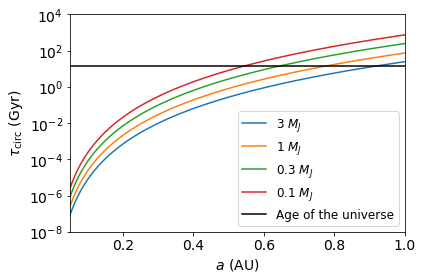

In [21]:
# Plot circularization time for a Jupiter analoge as a function of orbital distance.

orbits = np.linspace(0.01, 1, 10**4)
q_1 = 10**-3 # Jupiter is ~1/1000th the mass of the Sun.
R = 1. # Stellar radius
M = 1. # Stellar mass

# K should be 0.2 for Jupiter-like planets
circulars_3 = tcirc(3*10**-3, M, R, orbits, Q=10**5, k=0.2)/10**9 # in Gyr
circulars_1 = tcirc(10**-3, M, R, orbits, Q=10**5, k=0.2)/10**9 
circulars_03 = tcirc(3*10**-4, M, R, orbits, Q=10**5, k=0.2)/10**9 
circulars_01 = tcirc(10**-4, M, R, orbits, Q=10**5, k=0.2)/10**9 

matplotlib.rcParams.update({'font.size': 14})
fig, ax = plt.subplots()
ax.set_xlabel(r'$a$ (AU)')
ax.set_ylabel(r'$\tau_{\mathrm{circ}}$ (Gyr)')
ax.set_yscale('log')
ax.set_xlim([0.05, 1])
ax.set_ylim([10**-8, 10**4])

matplotlib.rcParams.update({'font.size': 12})
ax.plot(orbits, circulars_3, label=r'3 $M_J$')
ax.plot(orbits, circulars_1, label=r'1 $M_J$')
ax.plot(orbits, circulars_03, label=r'0.3 $M_J$')
ax.plot(orbits, circulars_01, label=r'0.1 $M_J$')
ax.axhline(13.8, color='black', label='Age of the universe')

ax.legend()
fig.savefig('circularization_curves.png', dpi=500)

## Implies that we would leave ~20 more planets out of our eccentricity hierarchical modeling.